# Data Analysis perform on Netflix dataset 
- You need to solve the following sceneario to help the company make informed business decisions accordingly.
  - What is the most frequent genre of movies released on Netflix?
  - What genres has highest votes?
  - What movie got the highest popularity? What's its genre?
  - What movie got the lowest popularity? What's it genre?
  - Which year has the most filmmed movies?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("mymoviedb.csv", lineterminator = '\n')

In [4]:
# View top 10 records, then use head function
df.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.484,33,6.6,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821,6.8,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/kZNHR1upJK...
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206,6.3,en,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114,5.3,en,"Action, Crime, Fantasy",https://image.tmdb.org/t/p/original/3cccEF9QZg...
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726,7.2,en,Science Fiction,https://image.tmdb.org/t/p/original/zByhtBvX99...


In [5]:
# Here copy the the dataset and store in new_variable because we can't change in original
df_copy = df.copy()

In [6]:
df_copy

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


### Overview the Data

In [7]:
df_copy.shape

(9827, 9)

In [8]:
df_copy.size

88443

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [10]:
df_copy.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploratory Data Analysis or EDA
### Exploratory Summary
- We have a dataframe consisting of 9827 rows and 9 columns.
- Our dataset looks a bit tidy with no NaNs nor duplicated values.
- Released_Date column needs to be casted into date time and to extract only the year value.
- Overview, Original_Language and Poster_URL wouldn't br so useful during the analysis, so we'll drop that.
- There is noticeable outliers in Popularity column.
- Vote_Average better be categorised for proper analysis.
- Genre column has comma separated values and while spaces that needs to be handled and casted into category.

### Checking missing data

In [11]:
df_copy.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

### Checking Duplicates values

In [12]:
df_copy.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [13]:
df_copy.duplicated().sum()

0

### Convert the DataTypes into correct Format/Type

In [14]:
df_copy['Release_Date'] = pd.to_datetime(df_copy['Release_Date'])
print(df_copy["Release_Date"].dtypes)

datetime64[ns]


In [15]:
df_copy['Year'] = df_copy['Release_Date'].dt.year
print(df_copy["Year"].dtypes)

int32


### Drop the unnecessary columns

In [16]:
df_copy.drop(columns = ['Overview', 'Original_Language', 'Poster_Url'], inplace = True, axis = 1)

In [17]:
# After do that methods, here call the whole data
df_copy

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,7.6,"Drama, Crime",1973
9823,2020-10-01,Violent Delights,13.356,8,3.5,Horror,2020
9824,2016-05-06,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror",2016
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History",2021


### Category Vote_Average Column
- We would cut the `Vote_Average` values and make 4 categories:
    - `popular`
    - `average`
    - `below_avg`
    - `not_popular`
to describe it more using `categorize_col()` function provided above.

In [18]:
# Create a user defined function
def categorize_col(df_copy, col, labels):
    
    edges = [df_copy[col].describe()['min'],
             df_copy[col].describe()['25%'],
             df_copy[col].describe()['50%'],
             df_copy[col].describe()['75%'],
             df_copy[col].describe()['max'],]

    df_copy[col] = pd.cut(df_copy[col], edges, labels = labels)
    return df_copy

In [19]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

categorize_col(df_copy, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,popular,"Drama, Crime",1973
9823,2020-10-01,Violent Delights,13.356,8,not_popular,Horror,2020
9824,2016-05-06,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror",2016
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History",2021


In [20]:
df_copy

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,popular,"Drama, Crime",1973
9823,2020-10-01,Violent Delights,13.356,8,not_popular,Horror,2020
9824,2016-05-06,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror",2016
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History",2021


In [21]:
df_copy["Vote_Average"].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

> - We'd split genres into a list and then explode our `DataFrame` to have only one genre per row for each movie

In [22]:
df_copy['Genre'] = df_copy['Genre'].str.split(',')

df_copy = df_copy.explode('Genre').reset_index(drop = True)

In [23]:
df_copy.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


### Casting the column `Genre` into Category

In [24]:
df_copy['Genre'] = df_copy['Genre'].astype('category')

In [25]:
df_copy['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [26]:
# Let's check again the whole information about the dataset to view the changes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25793 non-null  datetime64[ns]
 1   Title         25793 non-null  object        
 2   Popularity    25793 non-null  float64       
 3   Vote_Count    25793 non-null  int64         
 4   Vote_Average  25552 non-null  category      
 5   Genre         25793 non-null  category      
 6   Year          25793 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 958.8+ KB


In [27]:
df.nunique()

Release_Date         5893
Title                9513
Overview             9822
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      43
Genre                2337
Poster_Url           9827
dtype: int64

### Remove the Outliers
- Outliers are extreme data points that differ significantly from most other observations — they can distort your analysis.

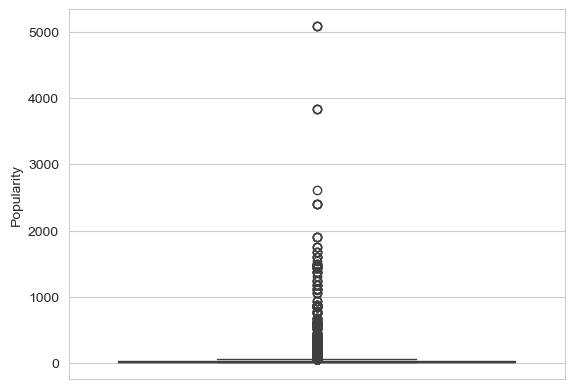

In [57]:
# There is involve the outliers
sns.boxplot(y = df_copy["Popularity"])
plt.show()

In [28]:
df_copy.describe()

,Release_Date,Popularity,Vote_Count,Year
count,25793,25793.000000,25793.000000,25793.000000
mean,2006-07-17 20:02:03.382312704,42.001288,1504.824526,2006.016322
min,1902-04-17 00:00:00,13.354000,0.000000,1902.000000
25%,2000-09-01 00:00:00,16.366000,166.000000,2000.000000
50%,2011-01-28 00:00:00,21.865000,490.000000,2011.000000
75%,2017-08-30 00:00:00,36.503000,1501.000000,2017.000000
max,2024-07-03 00:00:00,5083.954000,31077.000000,2024.000000
std,NaN,113.341050,2743.009590,15.490972


In [33]:
# Method no 1: Z-Score

zscore = (df_copy["Popularity"] - df_copy["Popularity"].mean()) / df_copy["Popularity"].std()

In [34]:
(5083.954 - 42.001288) / 113.341050	

44.48478915626774

In [35]:
zscore

0        44.484789
1        44.484789
2        44.484789
3        33.400579
4        33.400579
           ...    
25788    -0.252753
25789    -0.252753
25790    -0.252753
25791    -0.252753
25792    -0.252753
Name: Popularity, Length: 25793, dtype: float64

In [36]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df_copy["Popularity"].quantile(0.25)
Q3 = df_copy["Popularity"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_clean = df_copy[(df_copy["Popularity"] >= lower) & (df_copy["Popularity"] <= upper)]

print(f"Original data shape: {df_copy.shape}")
print(f"After removing outliers: {df_clean.shape}")

Original data shape: (25793, 7)
After removing outliers: (23015, 7)


In [37]:
25793 - 23015

2778

In [38]:
# After removing the outliers from the Dataset, then

df_clean

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
2778,1993-10-09,The Nightmare Before Christmas,66.691,7387,popular,Fantasy,1993
2779,1993-10-09,The Nightmare Before Christmas,66.691,7387,popular,Animation,1993
2780,1993-10-09,The Nightmare Before Christmas,66.691,7387,popular,Family,1993
2781,2019-10-25,How to Train Your Dragon: Homecoming,66.646,654,popular,Animation,2019
2782,2019-10-25,How to Train Your Dragon: Homecoming,66.646,654,popular,Fantasy,2019
...,...,...,...,...,...,...,...
25788,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25789,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History,2021
25790,1984-09-23,Threads,13.354,186,popular,War,1984
25791,1984-09-23,Threads,13.354,186,popular,Drama,1984


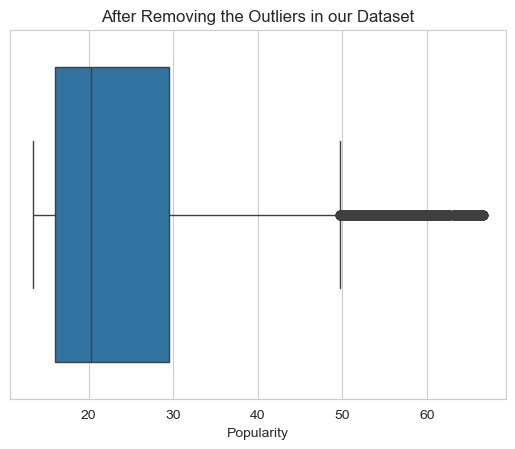

In [68]:
# After Removing
sns.boxplot(x = df_clean["Popularity"])
plt.title("After Removing the Outliers in our Dataset")
plt.show()

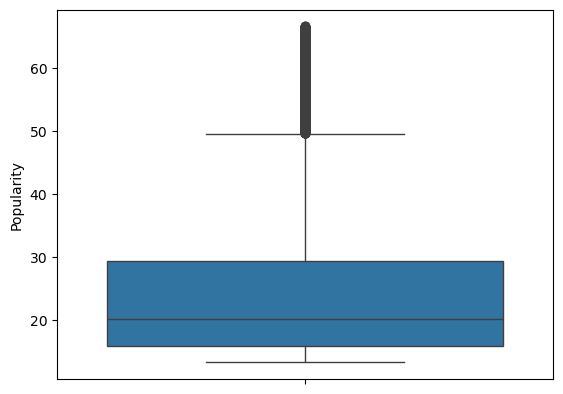

In [39]:
sns.boxplot(y = df_clean["Popularity"])
plt.show()

## Data Visualization

In [40]:
# Set the style for good visualize
sns.set_style('whitegrid')

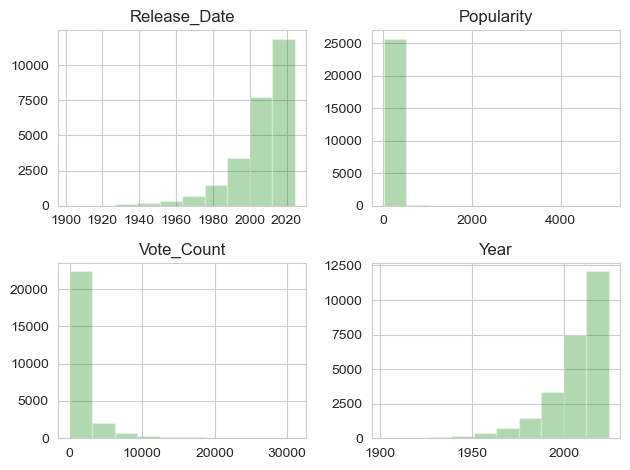

In [41]:
# Visualize the number's column
df_copy.hist(color='g',alpha=.3)
plt.tight_layout()
plt.show()

### Q1. What is the most frequent genre of movies released on Netflix?

In [42]:
df_copy["Genre"].describe()

count         25793
unique           38
top        Thriller
freq           1973
Name: Genre, dtype: object

<Figure size 600x400 with 0 Axes>

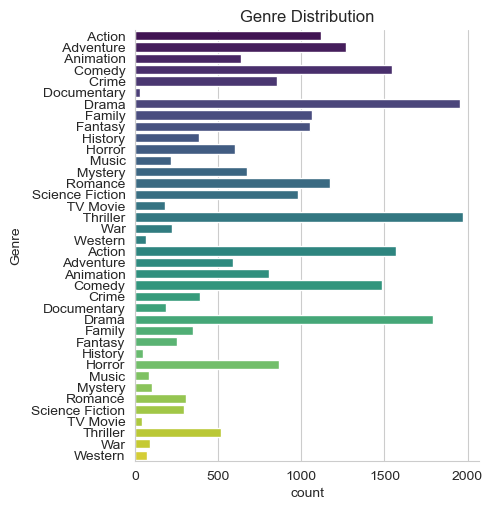

In [43]:
plt.figure(figsize=(6,4))
sns.catplot(kind = 'count', y='Genre', data=df_copy, palette='viridis')

plt.title("Genre Distribution")
plt.show()

### Q2. What genres has highest votes?

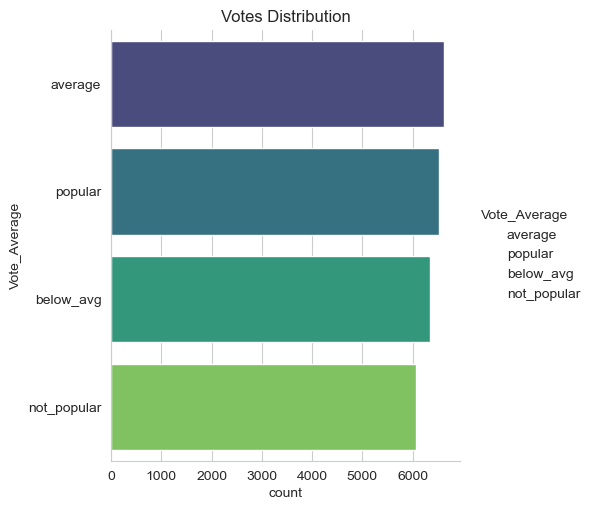

In [44]:
sns.catplot(data = df_copy, y = 'Vote_Average', kind = 'count', 
            order = df_copy['Vote_Average'].value_counts().index, 
            palette='viridis')
plt.title("Votes Distribution")
plt.show()

### Q3. What movie got the highest popularity? What's its genre?

In [39]:
df_copy[df_copy['Popularity'] == df_copy['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


### Q4. What movie got the lowest popularity? What's it genre?

In [40]:
df_copy[df_copy['Popularity'] == df_copy['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
25787,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25788,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25789,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History,2021
25790,1984-09-23,Threads,13.354,186,popular,War,1984
25791,1984-09-23,Threads,13.354,186,popular,Drama,1984
25792,1984-09-23,Threads,13.354,186,popular,Science Fiction,1984


### Q5. Which year has the most filmmed movies?

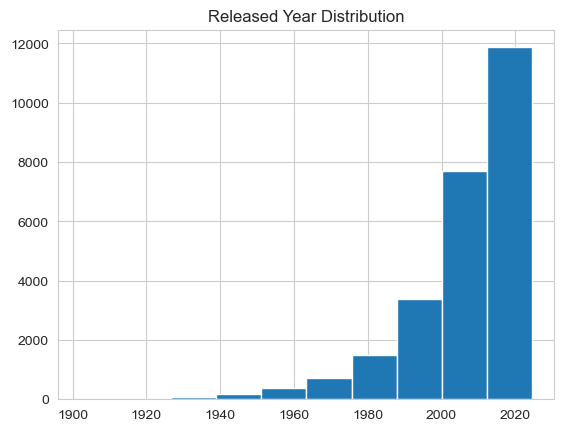

In [41]:
df_copy["Release_Date"].hist()
plt.title("Released Year Distribution")
plt.show()

## Conclusion
### Q1. What is the most frequent genre of movies released on Netflix?
- Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times amoung 19 other genres.

### Q2. What genres has highest votes?
- We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity amoung fans by being having more than 18.5% of movies popularities.

### Q3. What movie got the highest popularity? What's its genre?
- Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of `action`, `adventure`, and `science fiction`.

### Q4. What movie got the lowest popularity? What's it genre?
- The United States, thread has the highest lowest rate in our dataset and it has genres of `music`, `drama`, `war`, `sci-fi`, and `history`.

### Q5. Which year has the most filmmed movies?
- Year 2020 has the highest filming rate in our dataset